## UCP Optimisation Result Analytics

#### Read urban comfort index (UCI) data

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# read saved SSCI_gdf (SSA predictions version)
drive_path = "./Data"
SSCI_gdf = gpd.read_file(f"{drive_path}/Data_UCI_pUCI.gpkg")

# check the columns
print(SSCI_gdf.columns)

Index(['id', 'longitude', 'latitude', 'SP_1-E_comfort',
       'SP_2-E_sunshine_intensity', 'SP_3-E_temp_inference',
       'SP_4-E_humidity_inference', 'SP_5-E_wind_inference',
       'SP_6-E_greenery_rate', 'SP_7-E_shading_area', 'SP_8-E_heat_source',
       'SP_9-E_traffic_flow', 'SP_1-D_imageability', 'SP_2-D_enclosure',
       'SP_3-D_human_scale', 'SP_4-D_complexity', 'FC_rating', 'FC_density',
       'FC_1-R_eating_rating', 'FC_1-D_eating_density', 'FC_2-R_retail_rating',
       'FC_2-D_retail_density', 'FC_3-R_life_rating', 'FC_3-D_life_density',
       'FC_4-R_recreation_rating', 'FC_4-D_recreation_density',
       'FC_5-R_health_rating', 'FC_5-D_health_density',
       'FC_6-R_community_rating', 'FC_6-D_community_density',
       'FC_7-R_trans_rating', 'FC_7-D_trans_density', 'FC_1-H_HDB_density',
       'FC_1-G_review_polarity', 'FC_2-G_review_subjectivity',
       'AC_1-L_closeness400', 'AC_2-L_closeness800', 'AC_1-G_closeness2000',
       'AC_2-G_closeness6000', 'AC_1-T_su

#### Visualise UCI for each social activity

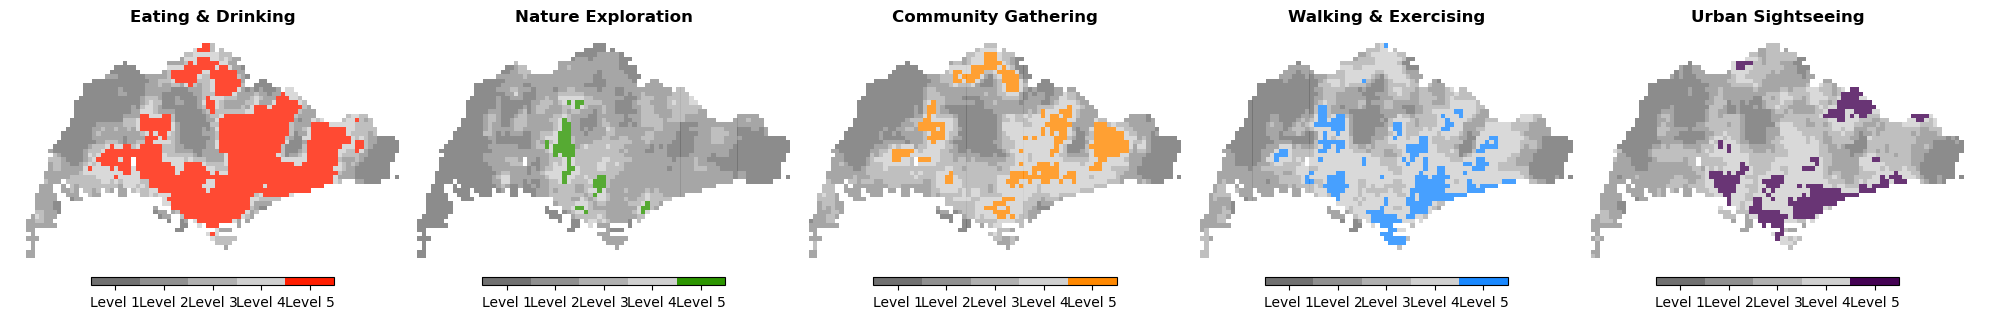

In [3]:
# Plot the UCI (Urban Comfort Index) for each social activity
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Define the UCI features to plot
uci_features = [
    'UCI_1_eating_and_drinking',
    'UCI_2_nature_exploration', 
    'UCI_3_community_gathering',
    'UCI_4_walking_and_exercising',
    'UCI_5_urban_sightseeing'
]

# Define feature labels for display
feature_labels = [
    'Eating & Drinking',
    'Nature Exploration',
    'Community Gathering', 
    'Walking & Exercising',
    'Urban Sightseeing'
]

# Define custom colors for each feature
custom_colors = ['#FF1D00', '#2C9500', '#FF8800', '#1988FF', '#440253']

# Create subplots for visualization
fig, axes = plt.subplots(1, len(uci_features), figsize=(20, 4))

for i, feature in enumerate(uci_features):
    if feature in SSCI_gdf.columns:
        # Get feature values and create 5-level classification
        feature_values = SSCI_gdf[feature]
        
        # Create 5 equal-interval bins
        vmin = feature_values.min()
        vmax = feature_values.max()
        bins = np.linspace(vmin, vmax, 6)  # 6 edges for 5 bins
        
        # Classify values into 5 levels
        SSCI_gdf[f'{feature}_level'] = pd.cut(feature_values, bins=bins, labels=[1, 2, 3, 4, 5], include_lowest=True)
        
        # Define 5 discrete colors from light to dark based on the main color
        base_color = custom_colors[i]
        # Convert hex to RGB
        base_rgb = mcolors.hex2color(base_color)
        
        # Create 5 discrete colors: very light gray to main color
        discrete_colors = [
            '#707070',  # Level 1: Medium dark gray
            '#909090',  # Level 2: Medium gray
            '#B0B0B0',  # Level 3: Medium light gray
            '#D0D0D0',  # Level 4: Light gray
            base_color  # Level 5: Main color
        ]
        
        # Create discrete colormap
        cmap = mcolors.ListedColormap(discrete_colors)
        
        # Plot the feature using discrete levels with square markers
        im = SSCI_gdf.plot(ax=axes[i], column=f'{feature}_level', cmap=cmap, alpha=0.8, 
                          markersize=10, marker='s', edgecolor='none', categorical=True)
        
        # Add colorbar with discrete levels
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.5, vmax=5.5))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=axes[i], shrink=0.6, location='bottom', pad=0.03, 
                           aspect=30, fraction=0.03, ticks=[1, 2, 3, 4, 5])
        cbar.set_ticklabels(['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])
        
        # Add title for each subplot
        axes[i].set_title(feature_labels[i], fontsize=12, fontweight='bold', pad=10)
        axes[i].set_axis_off()
    else:
        axes[i].set_axis_off()

plt.tight_layout(w_pad=-1)
plt.show()


#### Import optimisation results and visualise

Loading optimized data for all policies and features...
✓ Loaded pUCI_1 - SP_greenery_rate: 2096 records
✓ Loaded pUCI_1 - SP_imageability: 2096 records
✓ Loaded pUCI_1 - SP_shading_area: 2096 records
✓ Loaded pUCI_1 - SP_human_scale: 2096 records
✓ Loaded pUCI_1 - FC_life_rating: 2096 records
✓ Loaded pUCI_1 - FC_life_density: 2096 records
✓ Loaded pUCI_1 - AC_subway_accessibility: 2096 records
✓ Loaded pUCI_1 - AC_bus_accessibility: 2096 records
✓ Loaded pUCI_1 - CD_leisure_density: 2096 records
✓ Loaded pUCI_2 - SP_greenery_rate: 2096 records
✓ Loaded pUCI_2 - SP_imageability: 2096 records
✓ Loaded pUCI_2 - SP_shading_area: 2096 records
✓ Loaded pUCI_2 - SP_human_scale: 2096 records
✓ Loaded pUCI_2 - FC_life_rating: 2096 records
✓ Loaded pUCI_2 - FC_life_density: 2096 records
✓ Loaded pUCI_2 - AC_subway_accessibility: 2096 records
✓ Loaded pUCI_2 - AC_bus_accessibility: 2096 records
✓ Loaded pUCI_2 - CD_leisure_density: 2096 records
✓ Loaded pUCI_3 - SP_greenery_rate: 2096 records
✓

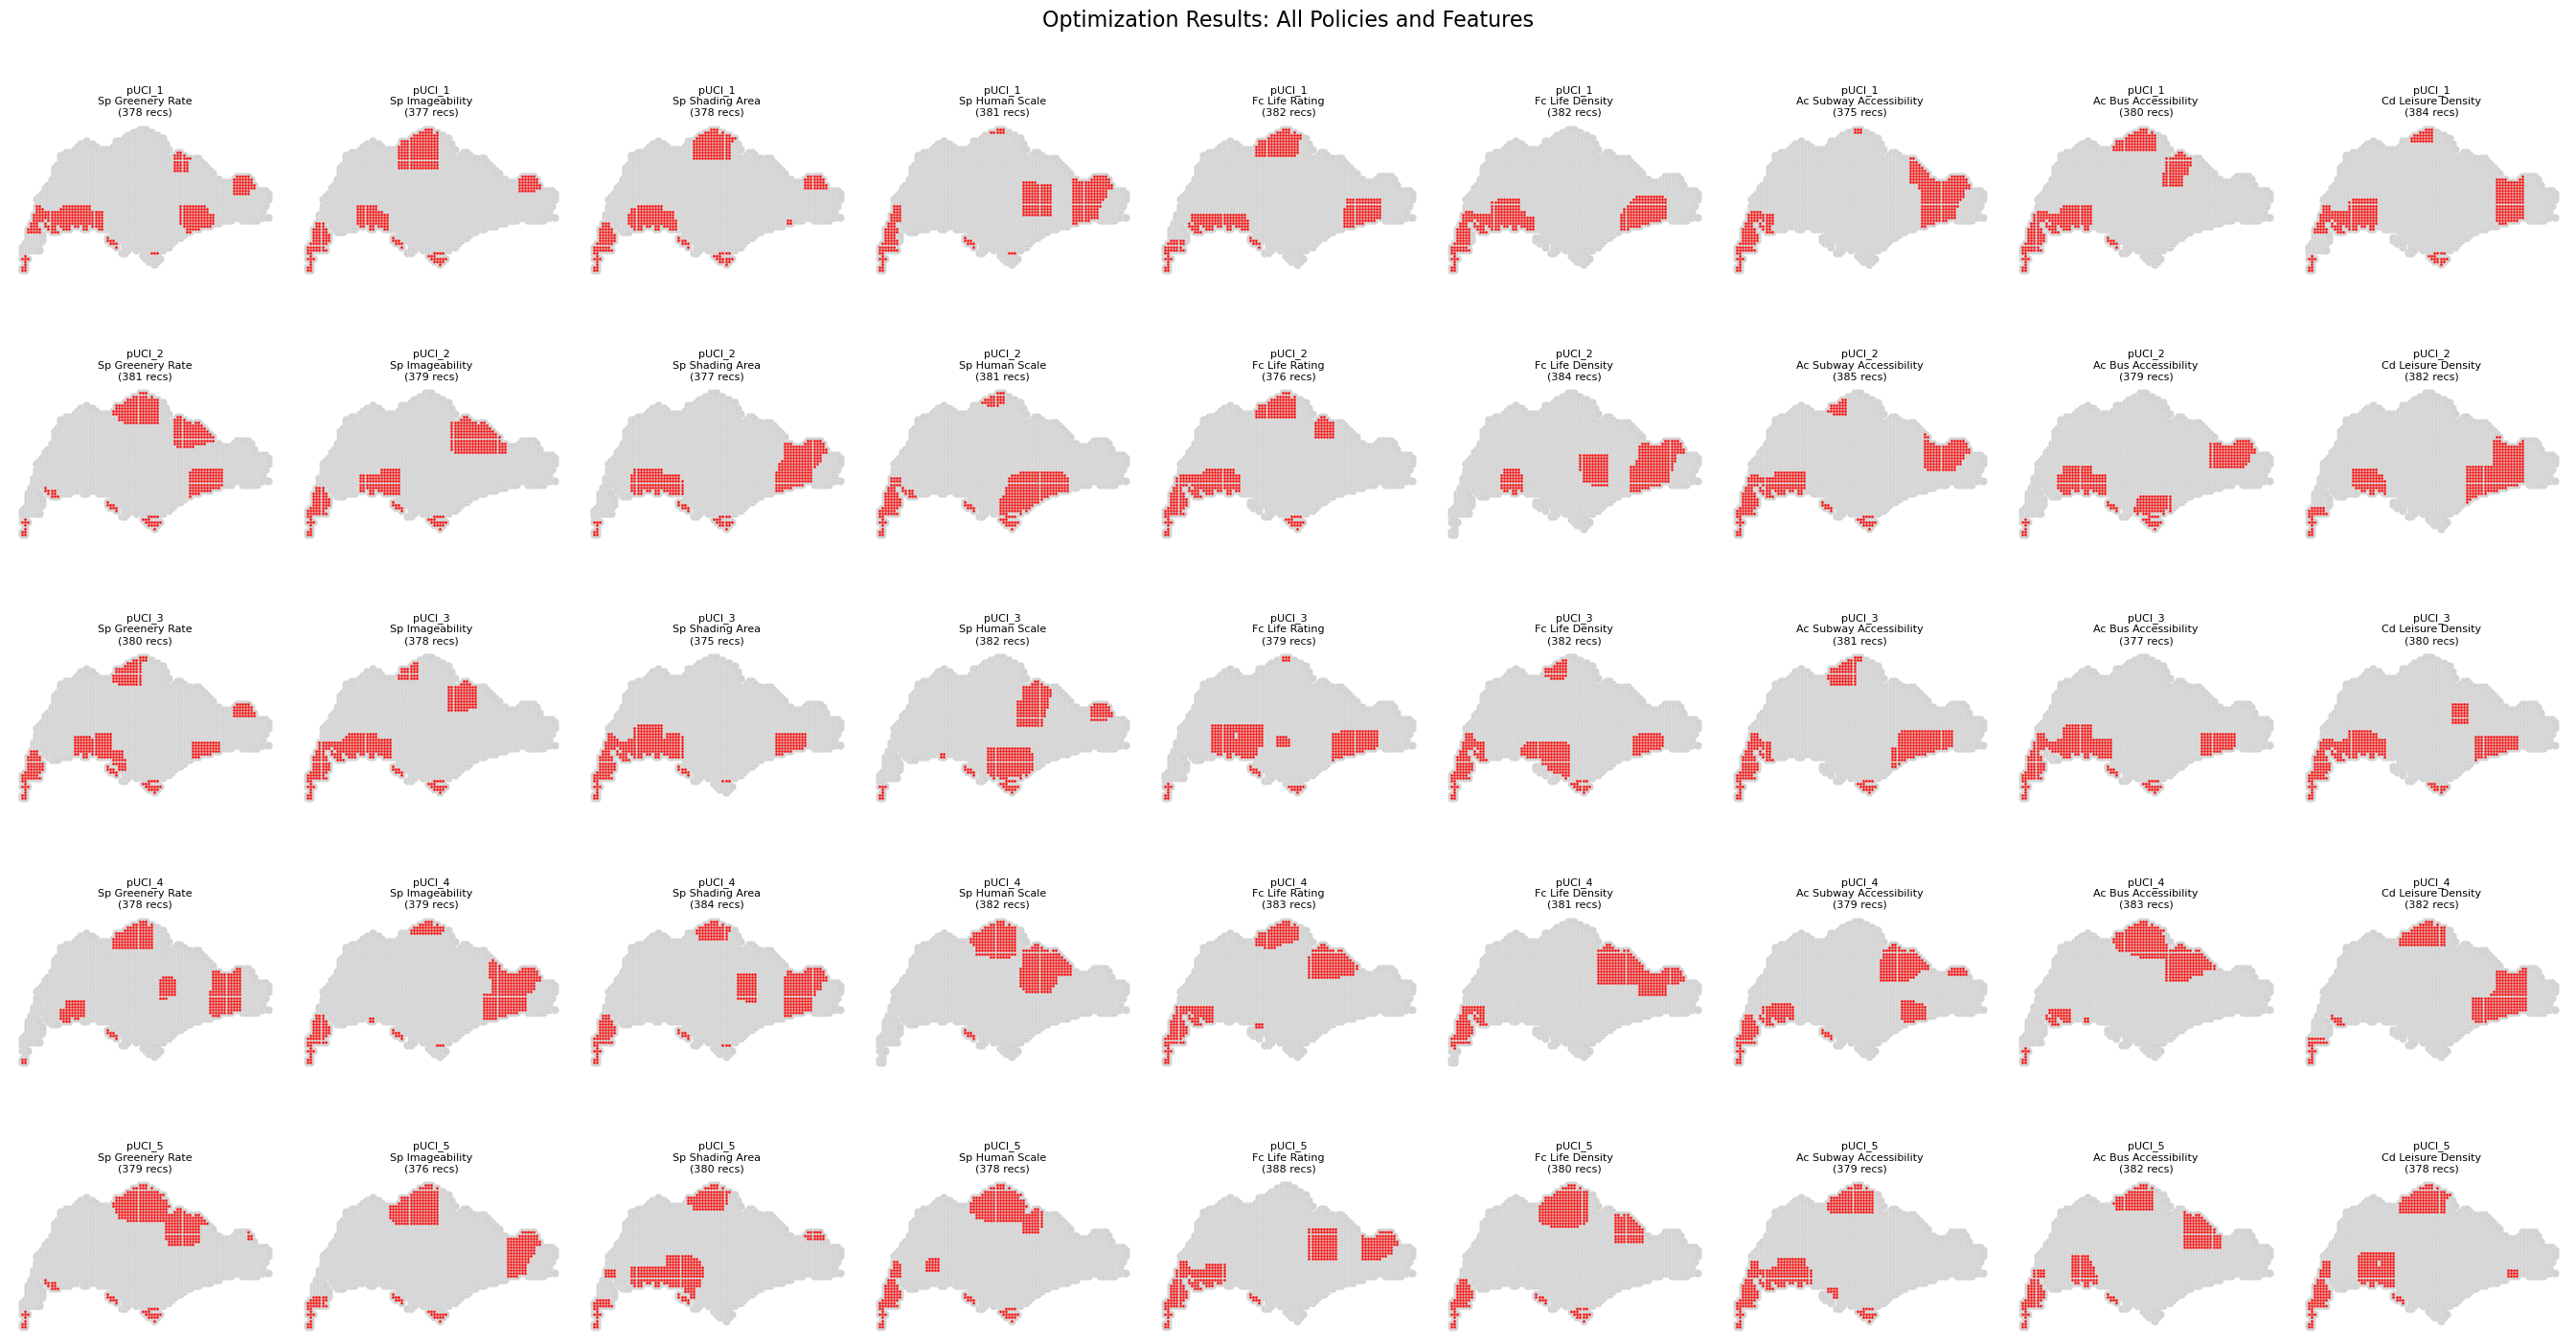


=== Recommendation Summary by Policy and Feature ===
Policy  SP_greenery_rate  SP_imageability  SP_shading_area  SP_human_scale  FC_life_rating  FC_life_density  AC_subway_accessibility  AC_bus_accessibility  CD_leisure_density  Total
pUCI_1               378              377              378             381             382              382                      375                   380                 384   3417
pUCI_2               381              379              377             381             376              384                      385                   379                 382   3424
pUCI_3               380              378              375             382             379              382                      381                   377                 380   3414
pUCI_4               378              379              384             382             383              381                      379                   383                 382   3431
pUCI_5               379            

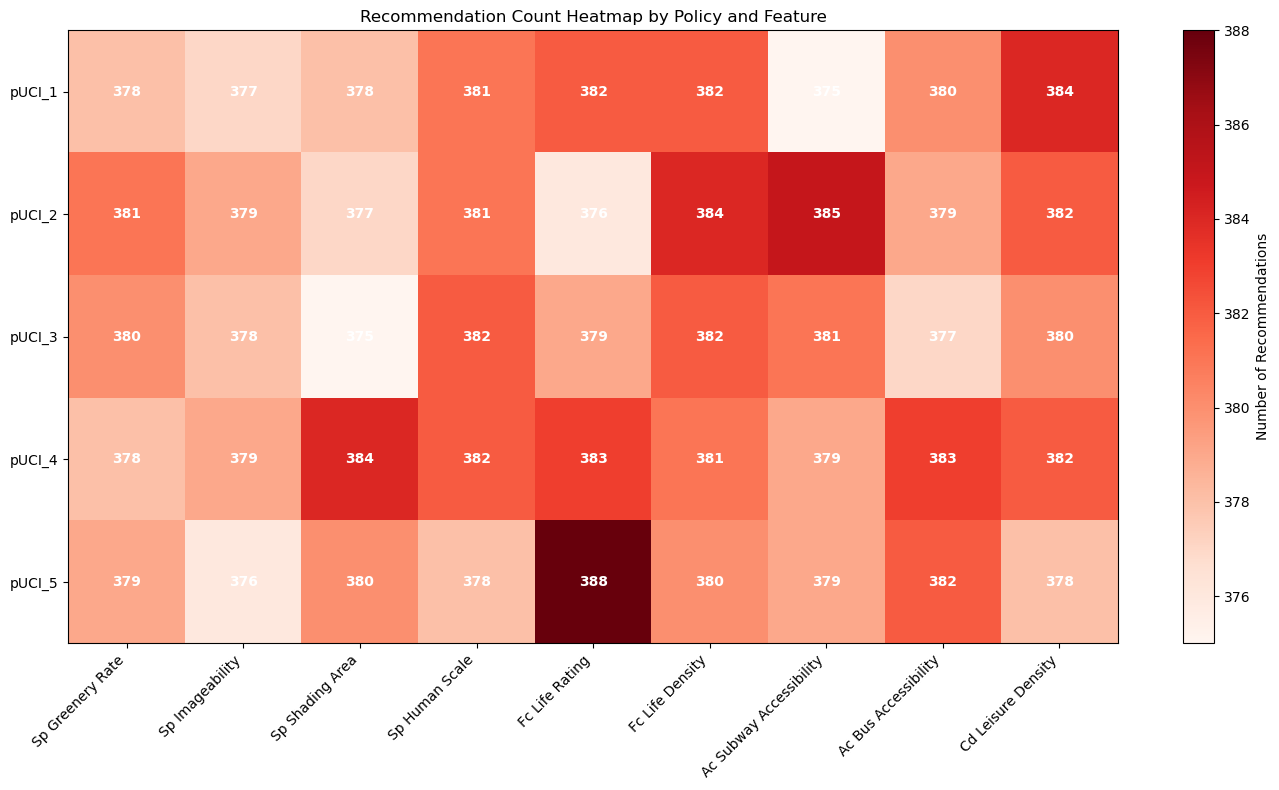


=== Detailed Statistics by Policy ===

PUCI_1:
  SP_greenery_rate: 378/2096 (18.0%)
  SP_imageability: 377/2096 (18.0%)
  SP_shading_area: 378/2096 (18.0%)
  SP_human_scale: 381/2096 (18.2%)
  FC_life_rating: 382/2096 (18.2%)
  FC_life_density: 382/2096 (18.2%)
  AC_subway_accessibility: 375/2096 (17.9%)
  AC_bus_accessibility: 380/2096 (18.1%)
  CD_leisure_density: 384/2096 (18.3%)
  TOTAL RECOMMENDATIONS: 3417

PUCI_2:
  SP_greenery_rate: 381/2096 (18.2%)
  SP_imageability: 379/2096 (18.1%)
  SP_shading_area: 377/2096 (18.0%)
  SP_human_scale: 381/2096 (18.2%)
  FC_life_rating: 376/2096 (17.9%)
  FC_life_density: 384/2096 (18.3%)
  AC_subway_accessibility: 385/2096 (18.4%)
  AC_bus_accessibility: 379/2096 (18.1%)
  CD_leisure_density: 382/2096 (18.2%)
  TOTAL RECOMMENDATIONS: 3424

PUCI_3:
  SP_greenery_rate: 380/2096 (18.1%)
  SP_imageability: 378/2096 (18.0%)
  SP_shading_area: 375/2096 (17.9%)
  SP_human_scale: 382/2096 (18.2%)
  FC_life_rating: 379/2096 (18.1%)
  FC_life_density

In [4]:
# Read the optimized data for all policies and all features, then visualize
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define policies and features
policy_names = ['pUCI_1', 'pUCI_2', 'pUCI_3', 'pUCI_4', 'pUCI_5']
feature_names = [
    'SP_greenery_rate',
    'SP_imageability', 
    'SP_shading_area',
    'SP_human_scale',
    'FC_life_rating',
    'FC_life_density',
    'AC_subway_accessibility',
    'AC_bus_accessibility',
    'CD_leisure_density'
]

# Dictionary to store all loaded data
all_policy_feature_data = {}

# Load data for each policy and feature combination
print("Loading optimized data for all policies and features...")
for policy in policy_names:
    all_policy_feature_data[policy] = {}
    for feature in feature_names:
        input_name = f'UCP_ising_optimisation_{policy}_{feature}'
        input_path = f'./Data/Optimisation_Result/{input_name}.gpkg'
        
        try:
            gdf = gpd.read_file(input_path)
            all_policy_feature_data[policy][feature] = gdf
            print(f"✓ Loaded {policy} - {feature}: {len(gdf)} records")
        except Exception as e:
            print(f"✗ Error loading {policy} - {feature}: {e}")
            all_policy_feature_data[policy][feature] = None

# Create comprehensive visualization for all policies and features
if any(any(data is not None for data in policy_data.values()) for policy_data in all_policy_feature_data.values()):
    
    # Create a large subplot grid: policies as rows, features as columns
    fig, axes = plt.subplots(len(policy_names), len(feature_names), 
                            figsize=(len(feature_names)*3, len(policy_names)*3))
    
    # Ensure axes is 2D array
    if len(policy_names) == 1:
        axes = axes.reshape(1, -1)
    elif len(feature_names) == 1:
        axes = axes.reshape(-1, 1)
    
    # Plot each policy-feature combination
    for i, policy in enumerate(policy_names):
        for j, feature in enumerate(feature_names):
            ax = axes[i, j]
            
            gdf = all_policy_feature_data[policy][feature]
            
            if gdf is not None:
                # Plot base map in light gray
                gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.1)
                
                # Plot recommended locations in red
                rec_col = f'{feature}_recommendation'
                if rec_col in gdf.columns:
                    recommended = gdf[gdf[rec_col] == 1]
                    if not recommended.empty:
                        recommended.plot(ax=ax, color='red', markersize=1, alpha=0.8)
                        recommendation_count = len(recommended)
                    else:
                        recommendation_count = 0
                else:
                    recommendation_count = 0
                
                # Set title
                feature_short = feature.replace('_', ' ').title()
                ax.set_title(f'{policy}\n{feature_short}\n({recommendation_count} recs)', 
                            fontsize=8, pad=5)
            else:
                # If data not available, show empty plot with message
                ax.text(0.5, 0.5, 'Data\nNot Available', 
                       ha='center', va='center', transform=ax.transAxes,
                       fontsize=8, color='red')
                ax.set_title(f'{policy}\n{feature.replace("_", " ").title()}\n(No Data)', 
                            fontsize=8, pad=5)
            
            ax.set_axis_off()
    
    plt.suptitle('Optimization Results: All Policies and Features', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    # Create summary statistics table
    print("\n=== Recommendation Summary by Policy and Feature ===")
    summary_data = []
    
    for policy in policy_names:
        policy_summary = {'Policy': policy}
        total_recommendations = 0
        
        for feature in feature_names:
            gdf = all_policy_feature_data[policy][feature]
            if gdf is not None:
                rec_col = f'{feature}_recommendation'
                if rec_col in gdf.columns:
                    count = len(gdf[gdf[rec_col] == 1])
                else:
                    count = 0
            else:
                count = 0
            
            policy_summary[feature] = count
            total_recommendations += count
        
        policy_summary['Total'] = total_recommendations
        summary_data.append(policy_summary)
    
    # Convert to DataFrame and display
    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))
        
        # Create heatmap of recommendation counts
        plt.figure(figsize=(14, 8))
        feature_display_names = [f.replace('_', ' ').title() for f in feature_names]
        heatmap_data = summary_df[feature_names].values
        
        im = plt.imshow(heatmap_data, cmap='Reds', aspect='auto')
        plt.colorbar(im, label='Number of Recommendations')
        
        # Set labels
        plt.xticks(range(len(feature_names)), feature_display_names, rotation=45, ha='right')
        plt.yticks(range(len(policy_names)), policy_names)
        
        # Add text annotations
        for i in range(len(policy_names)):
            for j in range(len(feature_names)):
                value = int(heatmap_data[i, j])
                plt.text(j, i, str(value), 
                        ha='center', va='center', 
                        color='white' if value > heatmap_data.max()/2 else 'black',
                        fontweight='bold')
        
        plt.title('Recommendation Count Heatmap by Policy and Feature')
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics for each policy
        print("\n=== Detailed Statistics by Policy ===")
        for policy in policy_names:
            print(f"\n{policy.upper()}:")
            policy_total = 0
            
            for feature in feature_names:
                gdf = all_policy_feature_data[policy][feature]
                if gdf is not None:
                    rec_col = f'{feature}_recommendation'
                    score_col = f'{feature}_score'
                    
                    if rec_col in gdf.columns:
                        rec_count = len(gdf[gdf[rec_col] == 1])
                        total_locations = len(gdf)
                        rec_rate = rec_count / total_locations * 100 if total_locations > 0 else 0
                        
                        print(f"  {feature}: {rec_count}/{total_locations} ({rec_rate:.1f}%)")
                        policy_total += rec_count
                    else:
                        print(f"  {feature}: No recommendation data")
                else:
                    print(f"  {feature}: Data not available")
            
            print(f"  TOTAL RECOMMENDATIONS: {policy_total}")
    
else:
    print("No data was successfully loaded!")
